In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df = df.iloc[:,1:]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 128)               1024      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,449
Trainable params: 11,449
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [16]:
history = model.fit(X_train_scaled,y_train,epochs=1000,validation_split=0.2)

Epoch 1/1000


C:\Users\Nihar\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


10/10 [==============================] - 1s 14ms/step - loss: 0.2151 - val_loss: 0.0411
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0375 - val_loss: 0.0343
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0222 - val_loss: 0.0203
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.0094
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0088 - val_loss: 0.0081
Epoch 6/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.0054
Epoch 7/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - val_loss: 0.0074
Epoch 8/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 9/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.0046
Epoch 10/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 11/10

10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 83/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 84/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0048
Epoch 85/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0048
Epoch 86/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0040
Epoch 87/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0044
Epoch 88/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 89/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 90/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 91/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0041
Epoc

10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0042
Epoch 163/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0041
Epoch 164/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0043
Epoch 165/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0043
Epoch 166/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 167/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0045
Epoch 168/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0044
Epoch 169/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0042
Epoch 170/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0042
Epoch 171/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0048
Epoch 243/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0046
Epoch 244/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0049
Epoch 245/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0049
Epoch 246/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0047
Epoch 247/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0049
Epoch 248/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0058
Epoch 249/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0058
Epoch 250/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0043
Epoch 251/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.

10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 323/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 324/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0047
Epoch 325/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0051
Epoch 326/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 327/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0049
Epoch 328/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0067
Epoch 329/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0053
Epoch 330/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0053
Epoch 331/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.

10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0062
Epoch 403/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 404/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0062
Epoch 405/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0066
Epoch 406/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0062
Epoch 407/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0056
Epoch 408/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 409/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0057
Epoch 410/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 411/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.

10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 483/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0069
Epoch 484/1000
10/10 [==============================] - 0s 4ms/step - loss: 9.4501e-04 - val_loss: 0.0066
Epoch 485/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0068
Epoch 486/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0067
Epoch 487/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0071
Epoch 488/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0066
Epoch 489/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0071
Epoch 490/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0065
Epoch 491/1000
10/10 [==============================] - 0s 4ms/step - loss: 9.5840e-04 - val_

10/10 [==============================] - 0s 5ms/step - loss: 8.0167e-04 - val_loss: 0.0069
Epoch 561/1000
10/10 [==============================] - 0s 4ms/step - loss: 7.0441e-04 - val_loss: 0.0078
Epoch 562/1000
10/10 [==============================] - 0s 4ms/step - loss: 7.1431e-04 - val_loss: 0.0075
Epoch 563/1000
10/10 [==============================] - 0s 4ms/step - loss: 7.3293e-04 - val_loss: 0.0071
Epoch 564/1000
10/10 [==============================] - 0s 4ms/step - loss: 7.0387e-04 - val_loss: 0.0076
Epoch 565/1000
10/10 [==============================] - 0s 4ms/step - loss: 8.2765e-04 - val_loss: 0.0081
Epoch 566/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0071
Epoch 567/1000
10/10 [==============================] - 0s 4ms/step - loss: 8.5344e-04 - val_loss: 0.0080
Epoch 568/1000
10/10 [==============================] - 0s 4ms/step - loss: 7.1112e-04 - val_loss: 0.0073
Epoch 569/1000
10/10 [==============================] - 0s 4ms/st

10/10 [==============================] - 0s 5ms/step - loss: 6.0589e-04 - val_loss: 0.0078
Epoch 638/1000
10/10 [==============================] - 0s 5ms/step - loss: 6.3086e-04 - val_loss: 0.0088
Epoch 639/1000
10/10 [==============================] - 0s 5ms/step - loss: 8.2965e-04 - val_loss: 0.0076
Epoch 640/1000
10/10 [==============================] - 0s 5ms/step - loss: 9.8413e-04 - val_loss: 0.0093
Epoch 641/1000
10/10 [==============================] - 0s 5ms/step - loss: 7.5568e-04 - val_loss: 0.0072
Epoch 642/1000
10/10 [==============================] - 0s 5ms/step - loss: 6.2039e-04 - val_loss: 0.0086
Epoch 643/1000
10/10 [==============================] - 0s 5ms/step - loss: 5.7485e-04 - val_loss: 0.0080
Epoch 644/1000
10/10 [==============================] - 0s 5ms/step - loss: 5.8244e-04 - val_loss: 0.0077
Epoch 645/1000
10/10 [==============================] - 0s 5ms/step - loss: 5.8913e-04 - val_loss: 0.0084
Epoch 646/1000
10/10 [==============================] - 0s 5m

10/10 [==============================] - 0s 5ms/step - loss: 5.0875e-04 - val_loss: 0.0084
Epoch 715/1000
10/10 [==============================] - 0s 5ms/step - loss: 5.4629e-04 - val_loss: 0.0082
Epoch 716/1000
10/10 [==============================] - 0s 4ms/step - loss: 5.7726e-04 - val_loss: 0.0082
Epoch 717/1000
10/10 [==============================] - 0s 4ms/step - loss: 5.9572e-04 - val_loss: 0.0078
Epoch 718/1000
10/10 [==============================] - 0s 5ms/step - loss: 5.8430e-04 - val_loss: 0.0078
Epoch 719/1000
10/10 [==============================] - 0s 4ms/step - loss: 6.9994e-04 - val_loss: 0.0086
Epoch 720/1000
10/10 [==============================] - 0s 5ms/step - loss: 7.2532e-04 - val_loss: 0.0075
Epoch 721/1000
10/10 [==============================] - 0s 4ms/step - loss: 5.8471e-04 - val_loss: 0.0088
Epoch 722/1000
10/10 [==============================] - 0s 5ms/step - loss: 4.9899e-04 - val_loss: 0.0080
Epoch 723/1000
10/10 [==============================] - 0s 5m

10/10 [==============================] - 0s 4ms/step - loss: 4.1619e-04 - val_loss: 0.0088
Epoch 792/1000
10/10 [==============================] - 0s 5ms/step - loss: 4.0246e-04 - val_loss: 0.0082
Epoch 793/1000
10/10 [==============================] - 0s 4ms/step - loss: 4.3017e-04 - val_loss: 0.0092
Epoch 794/1000
10/10 [==============================] - 0s 4ms/step - loss: 4.7387e-04 - val_loss: 0.0083
Epoch 795/1000
10/10 [==============================] - 0s 4ms/step - loss: 4.9510e-04 - val_loss: 0.0088
Epoch 796/1000
10/10 [==============================] - 0s 4ms/step - loss: 4.5567e-04 - val_loss: 0.0084
Epoch 797/1000
10/10 [==============================] - 0s 4ms/step - loss: 4.2091e-04 - val_loss: 0.0088
Epoch 798/1000
10/10 [==============================] - 0s 4ms/step - loss: 4.4691e-04 - val_loss: 0.0079
Epoch 799/1000
10/10 [==============================] - 0s 4ms/step - loss: 5.0456e-04 - val_loss: 0.0096
Epoch 800/1000
10/10 [==============================] - 0s 4m

10/10 [==============================] - 0s 4ms/step - loss: 4.0437e-04 - val_loss: 0.0084
Epoch 869/1000
10/10 [==============================] - 0s 4ms/step - loss: 3.6183e-04 - val_loss: 0.0084
Epoch 870/1000
10/10 [==============================] - 0s 5ms/step - loss: 4.1770e-04 - val_loss: 0.0090
Epoch 871/1000
10/10 [==============================] - 0s 5ms/step - loss: 4.2400e-04 - val_loss: 0.0086
Epoch 872/1000
10/10 [==============================] - 0s 5ms/step - loss: 4.1170e-04 - val_loss: 0.0082
Epoch 873/1000
10/10 [==============================] - 0s 5ms/step - loss: 5.0372e-04 - val_loss: 0.0097
Epoch 874/1000
10/10 [==============================] - 0s 4ms/step - loss: 5.2136e-04 - val_loss: 0.0076
Epoch 875/1000
10/10 [==============================] - 0s 4ms/step - loss: 5.5067e-04 - val_loss: 0.0085
Epoch 876/1000
10/10 [==============================] - 0s 5ms/step - loss: 4.3880e-04 - val_loss: 0.0083
Epoch 877/1000
10/10 [==============================] - 0s 4m

10/10 [==============================] - 0s 4ms/step - loss: 3.6170e-04 - val_loss: 0.0088
Epoch 946/1000
10/10 [==============================] - 0s 4ms/step - loss: 3.9170e-04 - val_loss: 0.0082
Epoch 947/1000
10/10 [==============================] - 0s 4ms/step - loss: 3.4431e-04 - val_loss: 0.0086
Epoch 948/1000
10/10 [==============================] - 0s 4ms/step - loss: 3.7128e-04 - val_loss: 0.0081
Epoch 949/1000
10/10 [==============================] - 0s 4ms/step - loss: 3.2432e-04 - val_loss: 0.0089
Epoch 950/1000
10/10 [==============================] - 0s 4ms/step - loss: 4.1422e-04 - val_loss: 0.0089
Epoch 951/1000
10/10 [==============================] - 0s 4ms/step - loss: 3.8476e-04 - val_loss: 0.0083
Epoch 952/1000
10/10 [==============================] - 0s 4ms/step - loss: 3.7610e-04 - val_loss: 0.0088
Epoch 953/1000
10/10 [==============================] - 0s 4ms/step - loss: 3.7196e-04 - val_loss: 0.0082
Epoch 954/1000
10/10 [==============================] - 0s 4m

In [17]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6871153480824581

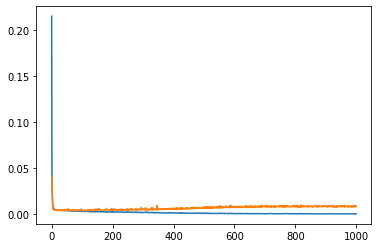

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])